In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_test=pd.read_csv(r"D:\ICT ML AND AI\case study 1\test_loan.csv")
data_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [3]:
# Explorative Data Analysis

In [4]:
data_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [5]:
data_test.shape

(367, 12)

In [6]:
data_test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [7]:
data_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [8]:
data_test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

<AxesSubplot:>

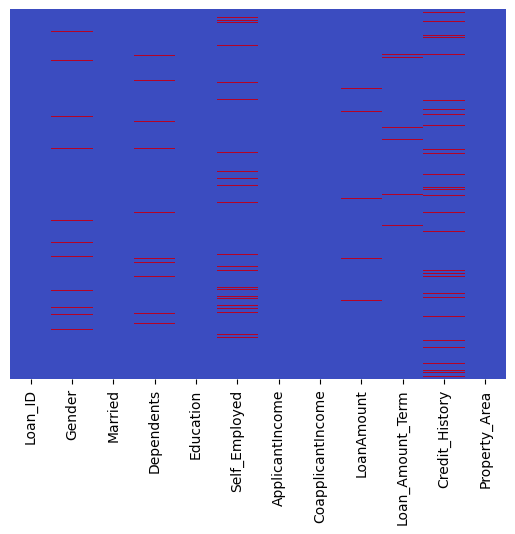

In [9]:
#heatmap
sns.heatmap(data=data_test.isna(),yticklabels=False,cmap='coolwarm',cbar=False)

In [10]:
#preprocessing

In [11]:
#handling missing values

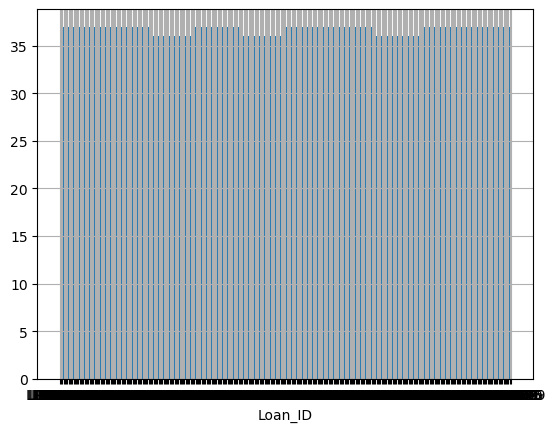

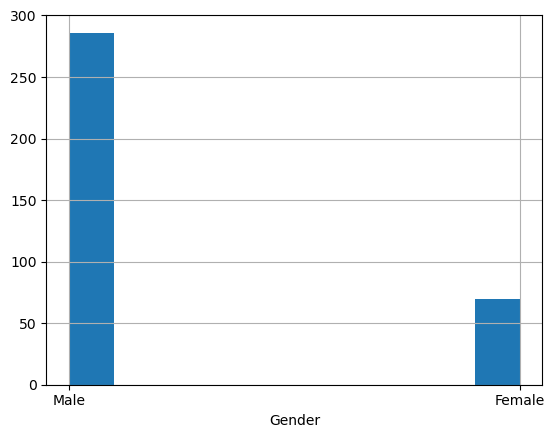

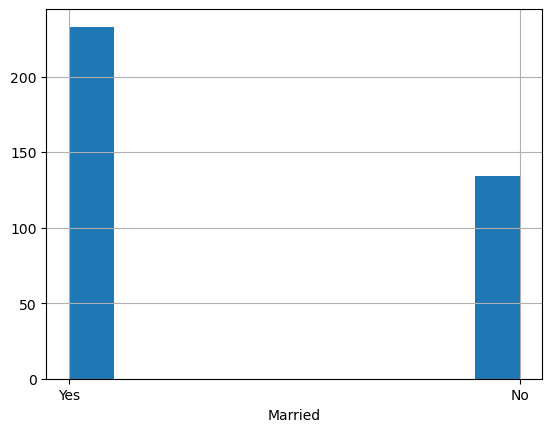

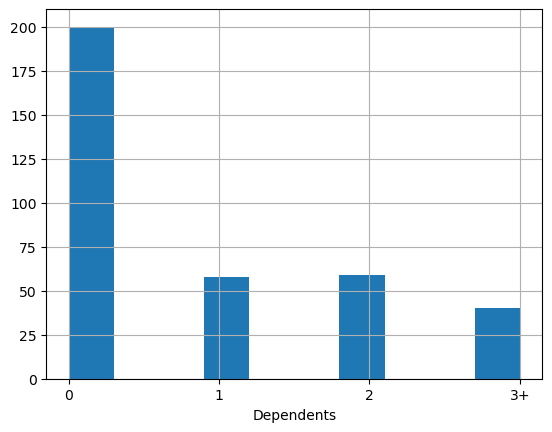

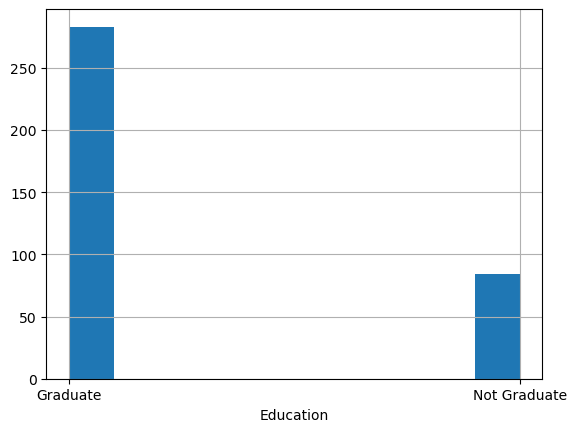

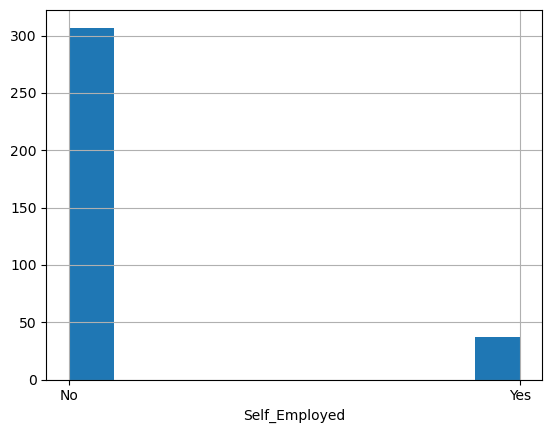

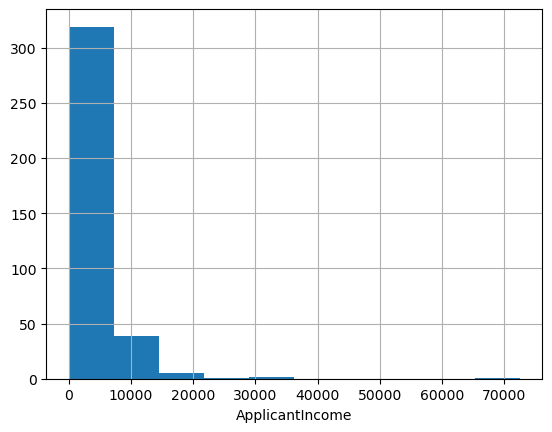

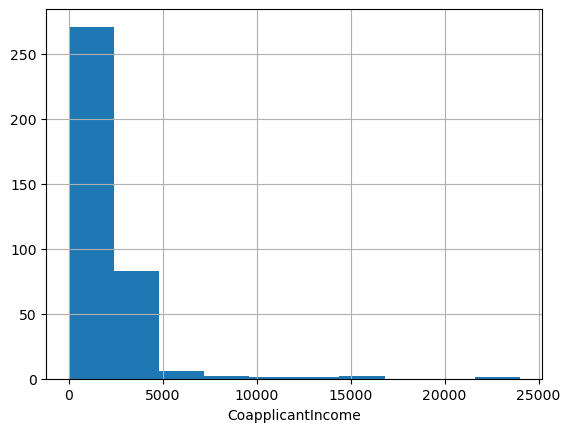

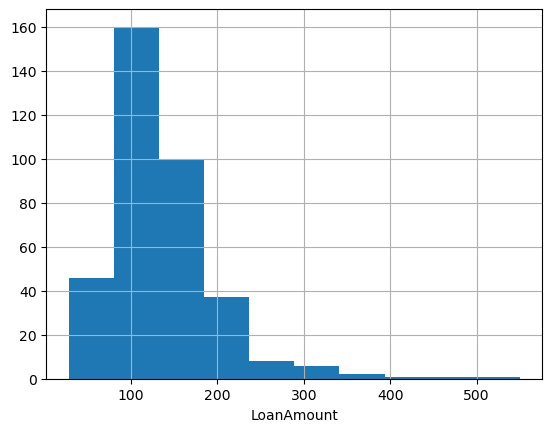

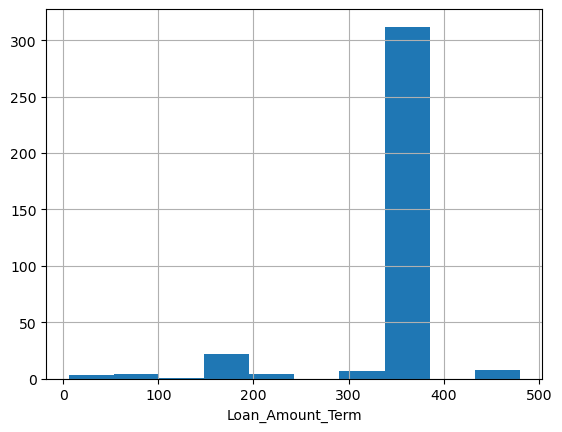

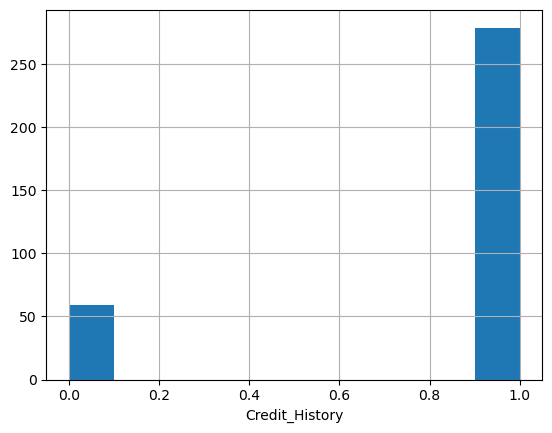

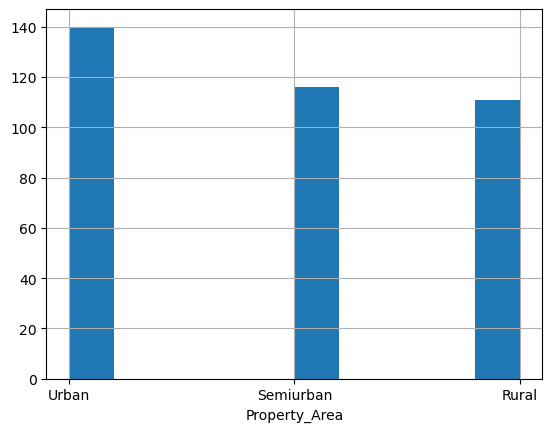

In [12]:
for i in data_test.columns:
    data_test[i].hist()
    plt.xlabel(i)
    plt.show()

In [13]:
data_test['Gender']=data_test['Gender'].fillna(data_test['Gender'].mode()[0])
data_test['Dependents']=data_test['Dependents'].fillna(data_test['Dependents'].mode()[0])
data_test['Self_Employed']=data_test['Self_Employed'].fillna(data_test['Self_Employed'].mode()[0])
data_test['LoanAmount']=data_test['LoanAmount'].fillna(data_test['LoanAmount'].median())
data_test['Loan_Amount_Term']=data_test['Loan_Amount_Term'].fillna(data_test['Loan_Amount_Term'].median())
data_test['Credit_History']=data_test['Credit_History'].fillna(data_test['Credit_History'].mode()[0])

In [14]:
data_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [15]:
#we have handled all the null values in the data

In [16]:
data_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [17]:
data_test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

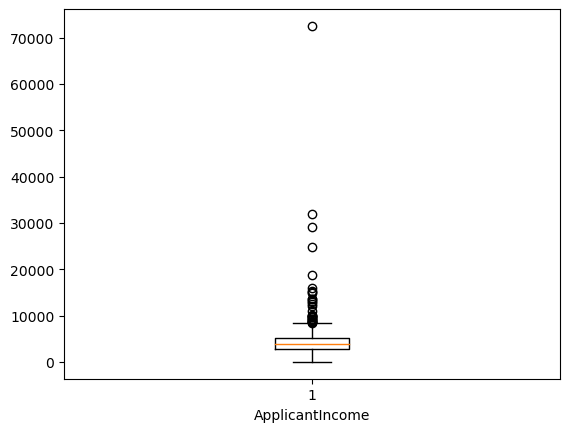

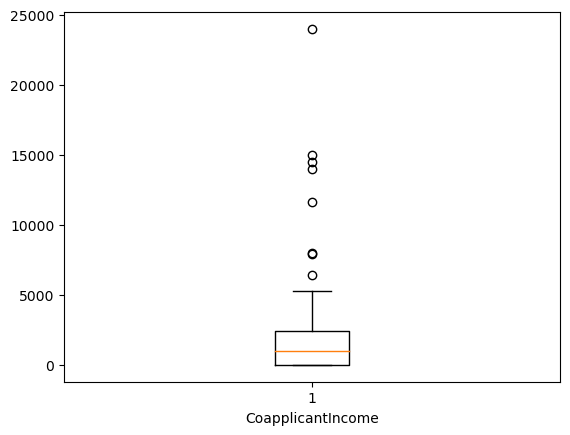

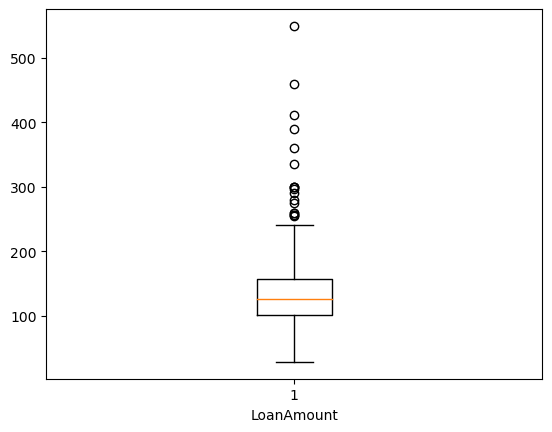

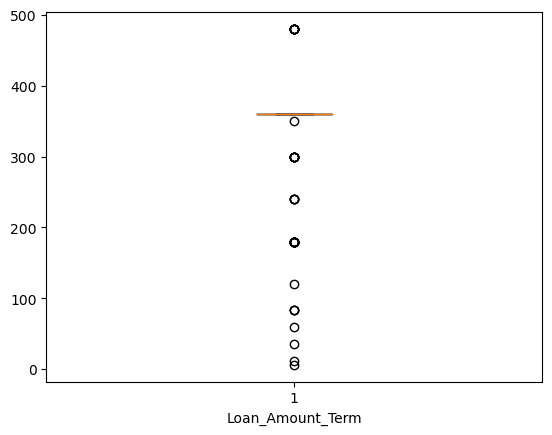

In [18]:
bxdatacolumns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']
for i in bxdatacolumns:
    plt.boxplot(data_test[i])
    plt.xlabel(i)
    plt.show()

In [19]:
#we can observe that outliers are present in eacha and every column so its better to cap
for i in bxdatacolumns:
    q1=np.percentile(data_test[i],25,interpolation='midpoint')
    q2=np.percentile(data_test[i],50,interpolation='midpoint')
    q3=np.percentile(data_test[i],75,interpolation='midpoint')
    IQR=q3-q1
    upp_lim=q3+1.5*IQR
    low_lim=q1-1.5*IQR
    data_test[i]=np.where(data_test[i]>upp_lim,upp_lim,np.where(data_test[i]<low_lim,low_lim,data_test[i]))

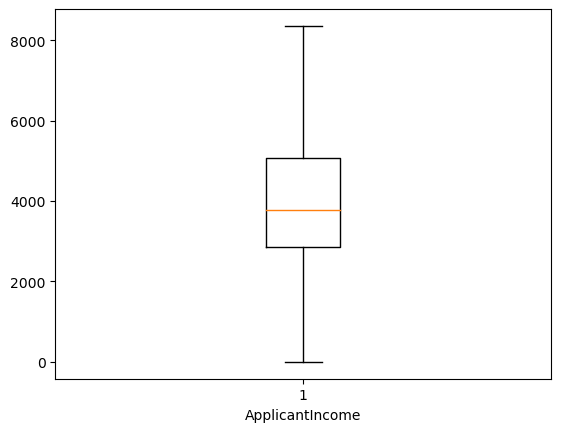

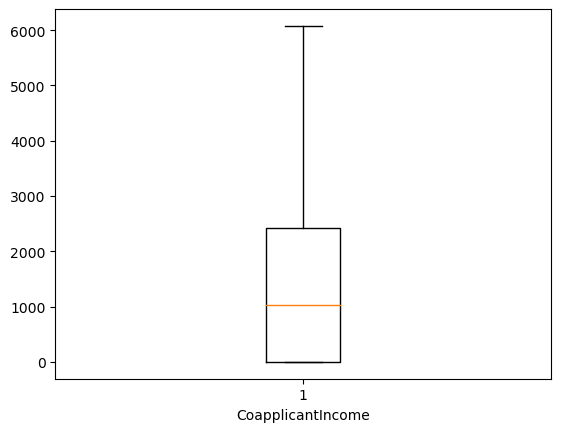

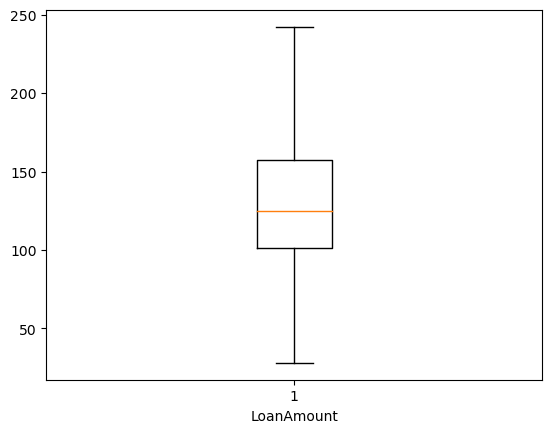

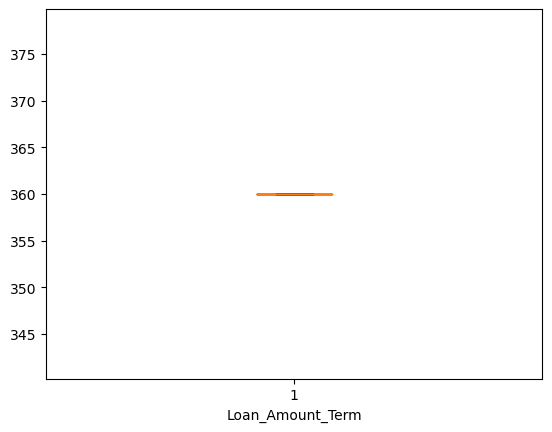

In [20]:
for i in bxdatacolumns:
    plt.boxplot(data_test[i])
    plt.xlabel(i)
    plt.show()

In [21]:
#Encoding

In [22]:
data_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720.0,0.0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076.0,1500.0,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000.0,1800.0,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340.0,2546.0,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276.0,0.0,78.0,360.0,1.0,Urban


In [23]:
data_test['Loan_ID'].nunique()

367

In [24]:
#has the all the values are unique this column will not have much effect on the data while processing
data_test=data_test.drop('Loan_ID',axis=1)
data_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720.0,0.0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076.0,1500.0,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000.0,1800.0,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340.0,2546.0,100.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276.0,0.0,78.0,360.0,1.0,Urban


In [25]:
data_test['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [26]:
data_test['Married'].unique()

array(['Yes', 'No'], dtype=object)

In [27]:
data_test['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [28]:
data_test['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [29]:
data_test['Property_Area'].unique()

array(['Urban', 'Semiurban', 'Rural'], dtype=object)

In [30]:
#encoding we are using one hot encoding here
data_test_encoded=pd.get_dummies(data_test)
data_test_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720.0,0.0,110.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,3076.0,1500.0,126.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,5000.0,1800.0,208.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,2340.0,2546.0,100.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,3276.0,0.0,78.0,360.0,1.0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1


In [31]:
#Scaling of data
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()


In [32]:
cols=data_test_encoded.columns

In [33]:
data_test_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720.0,0.0,110.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,3076.0,1500.0,126.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,5000.0,1800.0,208.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,2340.0,2546.0,100.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,3276.0,0.0,78.0,360.0,1.0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1


In [34]:
data_test_scaled=min_max.fit_transform(data_test_encoded)
data_test_scaled=pd.DataFrame(data_test_scaled,columns=cols)
data_test_scaled.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.684702,0.000000,0.382730,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.368207,0.246863,0.457410,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.598516,0.296235,0.840140,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.280105,0.419008,0.336056,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.392147,0.000000,0.233372,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [37]:
#hence all the specified steps of the preprocessing is complted